# Домашнее задание 8

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 21 апреля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_8

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим билинейную седловую задачу:
\begin{equation}
\min_{x \in [-10; 10]^d} \max_{y \in [-10; 10]^d} f(x,y) = (x-b_x)^T A (y - b_y) + \frac{\lambda}{2}\| x - b_x\|^2 - \frac{\lambda}{2}\| y - b_y\|^2,
\end{equation}
где в качестве матрицы $A$ - случайно сгенерированная матрица с $L =1000$, $\mu = 0.01$, $d = 100$, $b_x$ и $b_y$ - случайные векторы c компонентами из отрезка $[-10; 10]$, $\lambda = 1$.

__(а)__ Какое решение у данной задачи? Является ли данная задача сильно выпуклой по $x$ и сильно вогнутой по $y$? Если да, то чему равна константа сильной выпуклости? Является ли оператор, соотвествующего это задаче вариационного неравенства, сильно монотонным? Липшицевым? Чему равны $L$ и $\mu$ для данного оператора? 

Выпишем градиенты по $x$ и $y$:

$$ \nabla_x f(x,y) = A(y-b_y) + \lambda(x-b_x), $$

$$ \nabla_y f(x,y) = A^T(x-b_x) - \lambda(y-b_y). $$


$$F(z)=\nabla f(z) $$
$$F(z)=\left(\begin{array}{l}
\nabla_x f(x, y) \\
-\nabla_y f(x, y)
\end{array}\right)=\left(\begin{array}{c}
A\left(y-b_y\right)+\lambda\left(x-b_x\right) \\
-A^{\top}\left(x-b_x\right)+\lambda\left(y-b_y\right)
\end{array}\right)$$

Решение $z^*: F\left(z^*\right)=0$

$$
\left(x^*, y^*\right): \quad \begin{cases}A\left(y^*-b_y\right)+\lambda\left(x^*-b_x\right)=0 \quad(*)
-A^T\left(x^*-b_x\right)+\lambda\left(y^*-b_y\right)=0 \quad(* *)\end{cases} \\
(* *): A^{T}\left(x^*-b_x\right)=\lambda\left(y^*-b_y\right) \\
 A^{T} x^*=\lambda\left(y^*-b_y\right)+A^{\top} b_x \\
 x^*=\left(A^T\right)^{-1} \cdot\left\{\lambda\left(y^*-b_y\right)+A^T b_x\right\} \\
 \text { Подставим в } (*) \text { : } \\
 A y^*-A b_y+\lambda\left\{\left(A^*\right)^{-1}\left(\lambda\left(y^*-b_y\right)+A^* b_x\right)-b_x\right\}=0 \\
 \left(A+\lambda^2\left(A^{+}\right)^{-1}\right) y^*=A\left(b_x+b_y\right)+\lambda^2\left(A^{\top}\right)^{-1} b_y-\lambda\left(\left(A^{+}\right)^{-1} A^{\top} b_x\right)
 $$

$
Решение:\left\{\begin{array}{l}
\left.x^*=\left(A^{T}\right)^{-1} \cdot \{ \lambda\left(y^*-b_y\right)+A^{T} b_x\right\} = b_x\\
y^*=\left(A+\lambda^2\left(A^{T}\right)^{-1}\right)^{-1} (A\left(b_y\right)+\lambda^2\left(A^{T}\right)^{-1} b_y) = b_y
\end{array}\right. 
$

Оператор будет сильно монотонным в силу $\mu$ сильной выпуклости\вогнутости $f(x,y)$. Действительно, младшое собственное значение Гессиана равно $\lambda = 1$.

Условие Липшивости: 
\begin{equation}
||F(z_1)|| - ||F(z_2)|| \leq ||F(z_1) - F(z_2)|| \leq L_{op}||z_1 - z_2||
\end{equation}
Тогда константу Липшица оператора можно оценить как константу Липшица $||F(z)||$.

$||F(z)||^2 = ||\nabla_x f(x,y)||^2 + ||\nabla_y f(x, y)||^2 = ||A(y - b_y) + \lambda (x - b_x)||^2 + ||A^T(x - b_x) - \lambda (y - b_y)||^2$

Тогда константа липшица оператора будет максимальное собственное значение Гессиана этой функции.

Гессиан примерно будет равен $A$(с точностью прибавлении диагональной). Поэтому L = 1000.

__(б)__ Решите данную задачу с помощью метода градиентного спуска(подъема) с проекцией и с помощью метода Экстраградиента с проекцией(смотри Секцию 3.3 [статью](https://arxiv.org/pdf/1802.10551.pdf)). Для начала попробуйте теоретические шаги для данных методов. Далее подберите шаг для наилучшей сходимости. Постройте график сходимости (относительное расстояние до решения по аргументу от числа подсчетов градиентов). На графике должно быть 4 линии, по две на каждый из методов. Сделайте вывод.

In [1]:
import numpy as np
from numpy import linalg
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import math
import pandas as pd
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

In [2]:
d = 100
mu = 0.01
L = 1000
E = np.eye(d)
lamb = 1

def positive_determined_matrix(d, mu, L): #генерация положительно-определенной матрицы, так чтобы A-mu*I >= 0
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu, L,d)
        diagonal_entries[0] = mu
        diagonal_entries[1] = L
        D = np.diag(diagonal_entries)
        m = ortho_group.rvs(d)
        A = m.dot(D).dot(np.linalg.inv(m))
        if (np.all(np.linalg.eigvals(A-mu*E) >= 0)):
            i += 1
    return A

A = positive_determined_matrix(d, mu, L)
bx = np.random.uniform(-10, 10, d)
by = np.random.uniform(-10, 10, d)

In [3]:
def F(x, y, A, bx, by):
    return A@(y - by) + lamb*(x - bx), -A.T@(x - bx) + lamb*(y - by) 

In [4]:
def func(x, y, A, bx, by):
    return (x - bx).T@A@(y - by) + lamb*(x-bx)@(x-bx)/2 - lamb*(y-by)@(y-by)/2

In [5]:
def proc(a, i, rad):
    return(i-d)*abs(a[i])+sum(abs(a[k]) for k in range(i+1, d+1)) - rad

def projection(a, rad):
    a_sort = np.sort(abs(a))
    a_sort = np.insert(a_sort, 0, 0)
    g_diff = []
    k_sign = 0
    for i in range(d+1):
        g_diff.append(proc(a_sort, i, rad))
        if(g_diff[i] >= 0):
            k_sign = i
    mu = (sum(abs(a_sort[i]) for i in range(k_sign+1, d+1)) - rad)/(d-k_sign)
    
    S = np.sum(abs(a))
    if (S > rad):
        for j in range (d):
            if (a[j] > mu):
                a[j] = a[j] - mu
            elif (a[j] < - mu):
                a[j] = a[j] + mu
            else:
                a[j] = 0
    return a

In [6]:
def projection1(a, rad):
    for i in range (d):
        if (abs(a[i]) > rad):
            a[i] = a[i]/abs(a[i])*rad
    return a

In [7]:
x_true = bx
y_true = by
x_true = projection1(x_true, 10)
y_true = projection1(y_true, 10)

In [8]:
def GD(A, bx, by, start, lr, amount_of_iterations):
    x, y = start, start
    call = []
    criterionx = []
    criteriony = []
    for i in range(amount_of_iterations):
        x_op, y_op = F(x, y, A, bx, by)        
        x = projection1(x - lr*x_op, 10)
        y = projection1(y - lr*y_op, 10)
        criterionx.append(np.linalg.norm(x - x_true)**2)
        criteriony.append(np.linalg.norm(y - y_true)**2)
        call.append(2*i)
    return call, criterionx, criteriony

In [9]:
GD_min_max = GD(A, bx, by, np.zeros(d), 1/(L**2), 200000)

In [10]:
def EG(A, bx, by, start, lr, amount_of_iterations):
    x, x1, y, y1 = start, start, start, start
    call = []
    criterionx = []
    criteriony = []
    for i in range(amount_of_iterations):
        x_op1, y_op1 = F(x, y, A, bx, by)        
        x1 = x - lr*x_op1
        y1 = y - lr*y_op1
        x_op, y_op = F(x1, y1, A, bx, by) 
        x = projection1(x - lr*x_op, 10)
        y = projection1(y - lr*y_op, 10)
        criterionx.append(np.linalg.norm(x - x_true)**2)
        criteriony.append(np.linalg.norm(y - y_true)**2)
        call.append(4*i)
    return call, criterionx, criteriony

In [11]:
EG_min_max = EG(A, bx, by, np.zeros(d), 1/L, 100000)

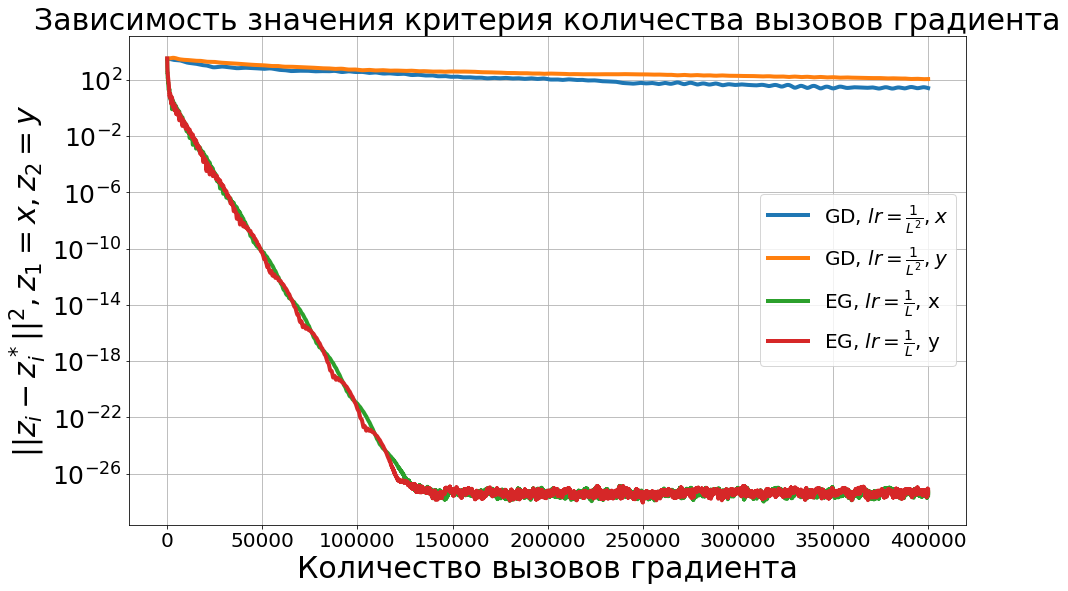

In [12]:
plt.figure(figsize=(15, 9))

plt.semilogy(GD_min_max[0], GD_min_max[1], linewidth=4, label = r"GD, $lr = \frac{1}{L^2}, x$")
plt.semilogy(GD_min_max[0], GD_min_max[2], linewidth=4, label = r"GD, $lr = \frac{1}{L^2}, y$")

plt.semilogy(EG_min_max[0], EG_min_max[1], linewidth=4, label = r"EG, $lr = \frac{1}{L}$, x")
plt.semilogy(EG_min_max[0], EG_min_max[2], linewidth=4, label = r"EG, $lr = \frac{1}{L}$, y")


plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Количество вызовов градиента", fontsize=30)
plt.ylabel(r"$||z_i - z_i^*||^2, z_1 = x, z_2 = y$", fontsize=30)
plt.title(r"Зависимость значения критерия количества вызовов градиента", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)


plt.grid(True)

Вывод: построили графики сходимости для двух методов. Для GD теоритических шаг - $\frac{1}{L^2}$, с ним метод показал лучшую сходимость, но она все равно плоха по сравнению с EG. Для EG теоритический шаг - $\frac{1}{4L}$, но с шагом $\frac{1}{L}$ метод сходится лучше

## Задача 2

Теперь рассмотрим билинейную задачу на симплексе. Описание задачи возьмите из [лекций](https://www2.isye.gatech.edu/~nemirovs/BrazilTransparenciesJuly4.pdf) - Слайд 125 "How it Works: Policeman vs. Burglar" и следующий.

__(а)__ Сгенерируйте матрицу для данной задачи размера $n=10$ c $\theta = 1$.

In [13]:
n, theta = 10, 1
W = np.random.uniform(1, 100, (n,n))
A = np.zeros((n, n))

In [14]:
def generate_BP_matrix(W):
    for i in range (10):
        for j in range(10):
            xi = i // 10
            yi = i % 10
            xj = j // 10
            yj = j % 10
            dist = abs(xi - xj) + abs(yi - yj)
            A[i][j] = W[i][j]*(1 - np.exp(-theta*dist))
    return A

In [15]:
A = generate_BP_matrix(W)

__(б)__ Для данной задачи предложите модификацию метода Экстраградиента, которая учитывает, что задача решается на симплексе. В этом может помочь [статья](https://arxiv.org/pdf/0809.0815.pdf) (смотри Секцию 3.3). Реализуйте данный метод.

В данной статье предлагают использовать проксиальное приближение для решения задачи. Выглядит она  для x как:
\begin{align*}
P_{r_{{\tau - 1}_x}}(\xi_x)_j = \left [ \sum_{i = 1}^n r_{{{\tau - 1}_x}_i} \cdot \exp{- \xi_{x_i}} \right ]^{-1} \cdot r_{{{\tau - 1}_x}_j} e^{-\xi_{x_j}} \\
\end{align*}
Для $y$ будет аналогично. 

Наша задача найти максимум следующей величины
\begin{align}
\max_{z \in Z} <F(z),w - z>
\end{align}
В силу сильной монотонности получается $F$, как критерий можно использовать:

\begin{align}
\max_{y \in Z} f(x^k, y) - \min_{x \in Z} f(x, y^k)
\end{align}
Для нашей задачи $f(x, y) = x^TAy$.

Для того, чтобы искать критерий будем идти по градиенту и проецироваться, пока не перестанет меняться точка проекции. В силу линейности, такое произойдет

In [16]:
def gradient(A, v, u):
    return A@u, -A.T@v

In [17]:
def proxial(rx, ry, gradx, grady):
    x = rx * np.exp(-gradx) / np.sum(rx*np.exp(-gradx))
    y = ry * np.exp(-grady) / np.sum(ry*np.exp(-grady))
    return x, y

Алгоритм проекции на симплекс взят из интернета

In [18]:
def euclidean_proj_simplex(v, s=1):
    assert s > 0, "Radius s must be strictly positive (%d <= 0)" % s
    n, = v.shape  # will raise ValueError if v is not 1-D
    # check if we are already on the simplex
    if v.sum() == s and np.alltrue(v >= 0):
        # best projection: itself!
        return v
    # get the array of cumulative sums of a sorted (decreasing) copy of v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    # get the number of > 0 components of the optimal solution
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - s))[0][-1]
    # compute the Lagrange multiplier associated to the simplex constraint
    theta = float(cssv[rho] - s) / (rho + 1)
    # compute the projection by thresholding v using theta
    w = (v - theta).clip(min=0)
    return w

In [19]:
def count_criterion(A, x, y):
    cur = np.ones(n) / n
    prev = np.zeros(n)
    while(np.any(cur != prev)):
        prev = cur
        cur = euclidean_proj_simplex(cur + A.T@x)
    max_y = x.T@A@cur

    cur = np.ones(n)/n
    prev = np.zeros(n)
    while(np.any(cur != prev)):
        prev = cur
        cur = euclidean_proj_simplex(cur - A@y)
    min_x = cur.T@A@y

    return max_y - min_x

In [20]:
def EG_proj_simplex(A, start, lr, amount_of_iterations):
    x, y = start, start
    criterion = []
    call = []
    for i in range(amount_of_iterations):
        gradx, grady = gradient(A, x, y)
        gradx *= lr
        grady *= lr
        x1, y1 = proxial(x, y, gradx, grady)
        gradx, grady = gradient(A, x1, y1)
        gradx *= lr
        grady *= lr
        x, y = proxial(x, y, gradx, grady)
        call.append(4*i)
        criterion.append(count_criterion(A, x, y))
    return call, criterion, x, y

In [21]:
EG_simplex = EG_proj_simplex(A, np.ones(n)/n, 1/2/L, 3000)

__(в)__ Решите билинейную задачу на симплексе с помощью нового метода и методов из Задачи 1. Как будете измерять сходимость? Возможно, в работах, из которых были взяты методы, найдется ответ. Постройте график сходимости. Визуализирйте полученный ответ, как это сделано в файле с лекциями. Сделайте вывод.  

In [22]:
def GD_proj(A, start, lr, amount_of_iterations):
    x, y = start, start
    call = []
    criterion = []
    for i in range(amount_of_iterations):
        x_op, y_op = gradient(A, x, y)        
        x = euclidean_proj_simplex(x - lr*x_op)
        y = euclidean_proj_simplex(y - lr*y_op)
        criterion.append(count_criterion(A, x, y))
        call.append(2*i)
    return call, criterion, x, y

In [23]:
def EG_proj(A, start, lr, amount_of_iterations):
    x, x1, y, y1 = start, start, start, start
    call = []
    criterion = []
    for i in range(amount_of_iterations):
        x_op1, y_op1 = gradient(A, x, y)        
        x1 = euclidean_proj_simplex(x - lr*x_op1)
        y1 = euclidean_proj_simplex(y - lr*y_op1)
        x_op, y_op = gradient(A, x1, y1)
        x = euclidean_proj_simplex(x - lr*x_op)
        y = euclidean_proj_simplex(y - lr*y_op)
        criterion.append(count_criterion(A, x, y))
        call.append(4*i)
    return call, criterion, x, y

In [24]:
GD_proj_simplex = GD_proj(A, np.ones(n)/n, 1/L**2, 6000)

In [25]:
EG_proj_simplex = EG_proj(A, np.ones(n)/n, 1/L, 2500)

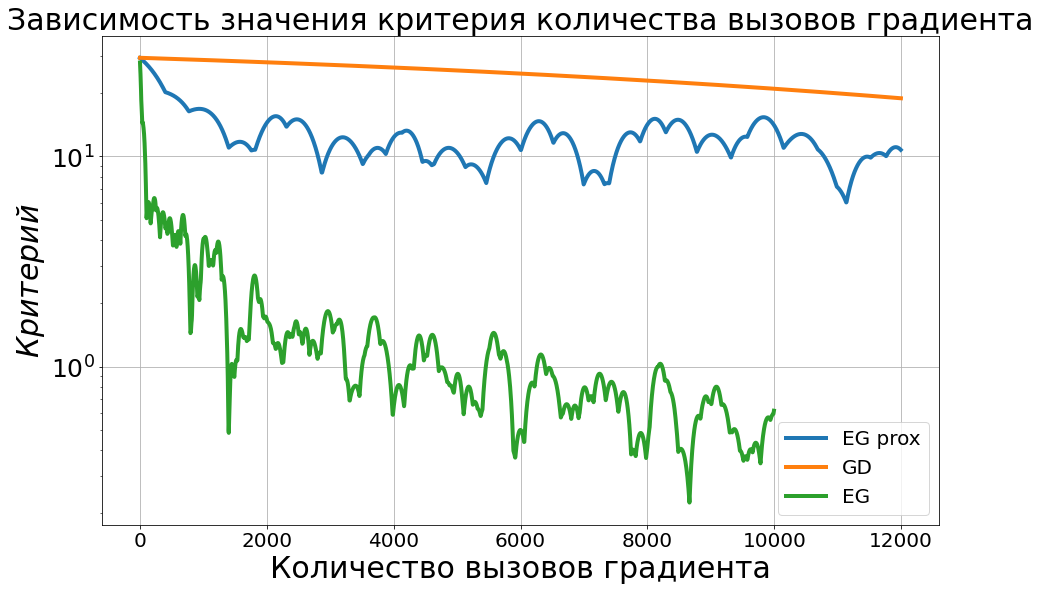

In [26]:
plt.figure(figsize=(15, 9))

plt.semilogy(EG_simplex[0], EG_simplex[1], linewidth=4, label = r"EG prox")
plt.semilogy(GD_proj_simplex[0], GD_proj_simplex[1], linewidth=4, label = r"GD")
plt.semilogy(EG_proj_simplex[0], EG_proj_simplex[1], linewidth=4, label = r"EG")


plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Количество вызовов градиента", fontsize=30)
plt.ylabel(r"$Критерий$", fontsize=30)
plt.title(r"Зависимость значения критерия количества вызовов градиента", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)


plt.grid(True)

In [27]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'GD')

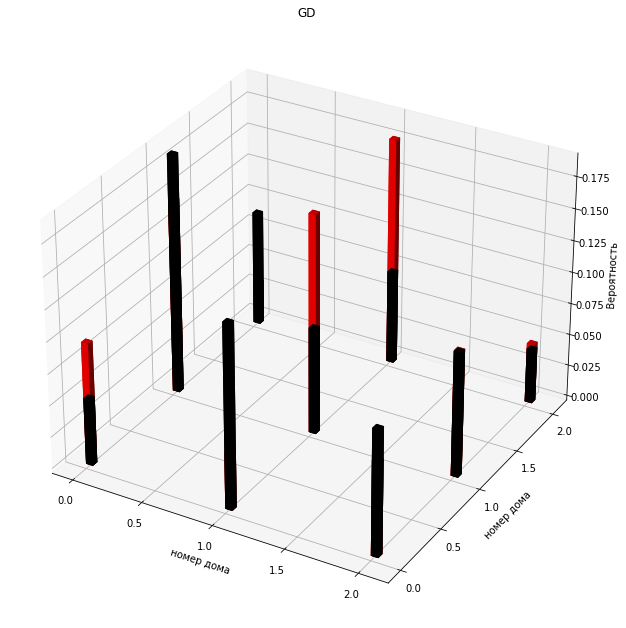

In [28]:
fig = plt.figure(figsize = (11, 11))
ax = plt.axes(projection ='3d')

p = int(n**0.5)

x = []
for i in range (p):
    for j in range (p):
        x.append(i)

y = np.array([i for i in range(p)] * p)
z = np.array([0 for i in range(p)] * p)

prob = []
for i in range (n-1):
    prob.append(GD_proj_simplex[2][i])

dx = np.array([0.05 for i in range(p)] * p)
dy = np.array([0.05 for i in range(p)] * p)
dz = prob


ax.bar3d(x, y, z, dx, dy, dz, color = 'red', label = 'Policemen')

x = []
for i in range (p):
    for j in range (p):
        x.append(i)

y = np.array([i for i in range(p)] * p)
z = np.array([0 for i in range(p)] * p)

prob = []
for i in range (n-1):
    prob.append(GD_proj_simplex[3][i])

dx = np.array([0.05 for i in range(p)] * p)
dy = np.array([0.05 for i in range(p)] * p)
dz = prob

ax.bar3d(x, y, z, dx, dy, dz, color = 'black', label = 'Burglar')

ax.set_xlabel("номер дома")
ax.set_ylabel("номер дома")
ax.set_zlabel("Вероятность")
ax.set_title("GD")

Text(0.5, 0.92, 'EG')

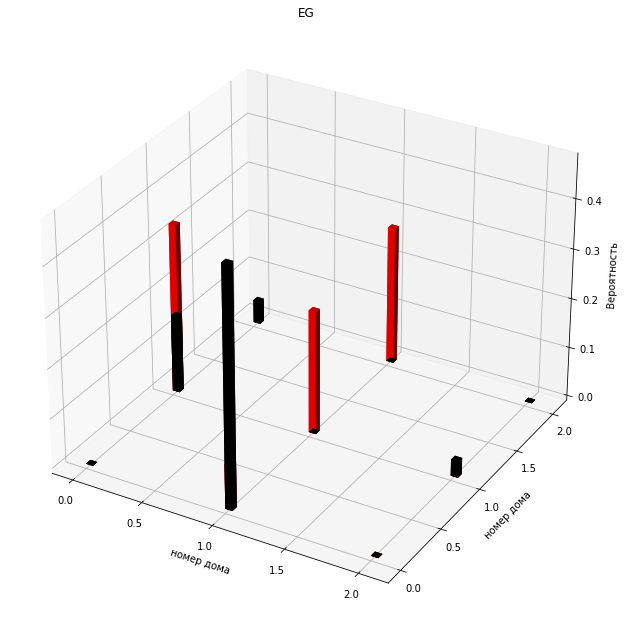

In [29]:
fig = plt.figure(figsize = (11, 11))
ax = plt.axes(projection ='3d')

p = int(n**0.5)

x = []
for i in range (p):
    for j in range (p):
        x.append(i)

y = np.array([i for i in range(p)] * p)
z = np.array([0 for i in range(p)] * p)

prob = []
for i in range (n-1):
    prob.append(EG_proj_simplex[2][i])

dx = np.array([0.05 for i in range(p)] * p)
dy = np.array([0.05 for i in range(p)] * p)
dz = prob


ax.bar3d(x, y, z, dx, dy, dz, color = 'red', label = 'Policemen')

x = []
for i in range (p):
    for j in range (p):
        x.append(i)

y = np.array([i for i in range(p)] * p)
z = np.array([0 for i in range(p)] * p)

prob = []
for i in range (n-1):
    prob.append(EG_proj_simplex[3][i])

dx = np.array([0.05 for i in range(p)] * p)
dy = np.array([0.05 for i in range(p)] * p)
dz = prob

ax.bar3d(x, y, z, dx, dy, dz, color = 'black', label = 'Burglar')

ax.set_xlabel("номер дома")
ax.set_ylabel("номер дома")
ax.set_zlabel("Вероятность")
ax.set_title("EG")

Text(0.5, 0.92, 'EG proximal')

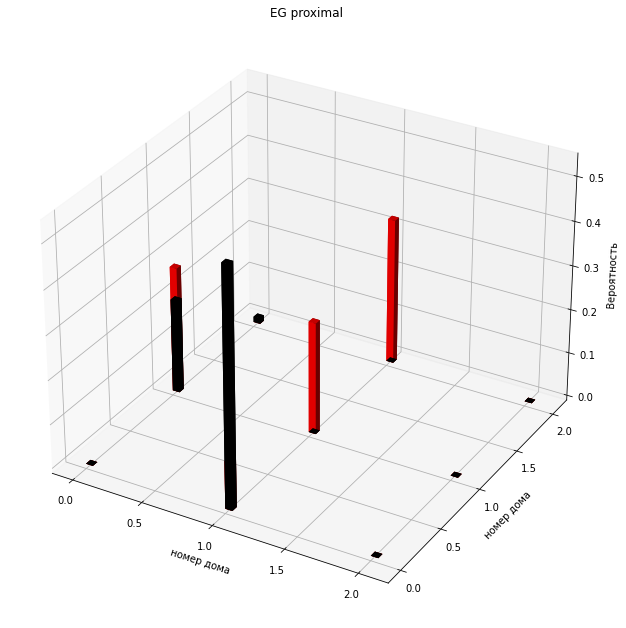

In [30]:
fig = plt.figure(figsize = (11, 11))
ax = plt.axes(projection ='3d')

p = int(n**0.5)

x = []
for i in range (p):
    for j in range (p):
        x.append(i)

y = np.array([i for i in range(p)] * p)
z = np.array([0 for i in range(p)] * p)

prob = []
for i in range (n-1):
    prob.append(EG_simplex[2][i])

dx = np.array([0.05 for i in range(p)] * p)
dy = np.array([0.05 for i in range(p)] * p)
dz = prob


ax.bar3d(x, y, z, dx, dy, dz, color = 'red', label = 'Policemen')

x = []
for i in range (p):
    for j in range (p):
        x.append(i)

y = np.array([i for i in range(p)] * p)
z = np.array([0 for i in range(p)] * p)

prob = []
for i in range (n-1):
    prob.append(EG_simplex[3][i])

dx = np.array([0.05 for i in range(p)] * p)
dy = np.array([0.05 for i in range(p)] * p)
dz = prob

ax.bar3d(x, y, z, dx, dy, dz, color = 'black', label = 'Burglar')

ax.set_xlabel("номер дома")
ax.set_ylabel("номер дома")
ax.set_zlabel("Вероятность")
ax.set_title("EG proximal")

Вывод: алгоритм EG из задачи 1 показал себя лучше всех в плане сходимости. Но в распределении вероятности, где надо находится вору и полицейскому методы EG и EG prox показли себя хорошо, GD ожидаемо хуже

__Бонусные пункты__

__(г)__ Реализуйте методы из Секции 3 [работы](https://arxiv.org/pdf/1908.08465.pdf). Решите с помощью них Задачу 1. Добавьте сходимость на график из пункта (б) Задачи 1.

In [31]:
#ответ

__(д)__ Реализуйте Алгоритм 1 и Алгоритм 2 из [работы](https://arxiv.org/pdf/2102.08352.pdf). Решите с помощью них Задачу 2 (могут помочь Секции 5 и 6 из упомянутой работы). Добавьте сходимость на график из пункта (в) Задачи 2, предварительно поменяв ось $x$ (что теперь будете откладывать по оси $x$?).

In [32]:
#ответ